<img src="images/innodb.jpg" width="600">

Results:
    
    Insert speed was found to be independent of table size. The size of file had a direct corelation insertion speed. 
    
Solution:

    Split data file by year_month_day_hour_min_campaign_machine when logging, insert in parallel into campaign tables in parallel with no buffer table. Adding the campaign partition will speed up the insertion time, allows inserts to be done in parallel, and cut out the middle man of having a buffer table.
    
Notes:
    
    Currently using the fastest insert operation in MYSQL
    
     "When loading a table from a text file, use LOAD DATA. This is usually 20 times faster than using INSERT statements. See Section 13.2.6, “LOAD DATA Syntax”."
    
Settings to improve load time:

    innodb_doublewrite = 0
    innodb_support_xa = 0
    innodb_buffer_pool_size = (50-80% of system memory)
    innodb_log_file_size = (a large number - 256M etc)
    innodb_flush_log_at_trx_commit = 0
    



In [31]:
from matplotlib import pyplot

In [32]:
items =[( 3 , 55312997 ),( 3 , 52206524 ),( 0 , 409186 ),( 4 , 66901490 ),( 3 , 55650441 ),( 3 , 60129979 ),( 3 , 55991593 ),( 3 , 59157445 ),( 3 , 58518978 ),( 3 , 49348122 ),( 0 , 377240 ),( 3 , 59142302 ),( 0 , 374435 ),( 3 , 55376266 ),( 3 , 57892609 ),( 3 , 56146034 ),( 3 , 57068552 ),( 0 , 376727 ),( 3 , 60280459 ),( 4 , 69986498 ),( 4 , 63426187 ),( 2 , 43767215 ),( 4 , 76933835 ),( 1 , 29832429 ),( 4 , 65560989 ),( 0 , 379088 ),( 7 , 115600210 ),( 0 , 389414 ),( 1 , 27134026 ),( 2 , 40127771 ),( 1 , 23974651 ),( 1 , 28803271 ),( 0 , 388523 ),( 7 , 117319614 ),( 4 , 62708192 ),( 3 , 54226508 ),( 3 , 60414943 ),( 3 , 52402198 ),( 4 , 74428022 ),( 2 , 42177404 ),( 0 , 350212 ),( 4 , 73570038 ),( 0 , 347962 ),( 4 , 63427425 ),( 2 , 42584862 ),( 3 , 47434175 ),( 2 , 40896410 ),( 0 , 355392 ),( 5 , 83252782 ),( 3 , 57255479 ),( 3 , 61276761 ),( 3 , 56556775 ),( 3 , 59738253 ),( 3 , 59303259 ),( 3 , 49823383 ),( 0 , 329430 ),( 3 , 58481009 ),( 0 , 330294 ),( 3 , 56315839 ),( 3 , 57617043 ),( 3 , 55973107 ),( 3 , 55617199 ),( 0 , 325017 ),( 4 , 59384055 ),( 2 , 46163808 ),( 3 , 61538448 ),( 2 , 46552750 ),( 3 , 55481261 ),( 3 , 49312867 ),( 3 , 50777217 ),( 0 , 502828 ),( 4 , 66491128 ),( 0 , 501020 ),( 3 , 55734342 ),( 3 , 62894662 ),( 3 , 58517340 ),( 3 , 56690556 ),( 0 , 489657 ),( 4 , 70392258 ),( 3 , 57829345 ),( 4 , 66657689 ),( 3 , 59529804 ),( 4 , 67648438 ),( 4 , 57447533 ),( 2 , 35910780 ),( 0 , 636049 ),( 3 , 61500405 ),( 0 , 622954 ),( 3 , 55005095 ),( 3 , 60891388 ),( 3 , 58377696 ),( 3 , 52958844 ),( 0 , 633082 ),( 3 , 61596218 ),( 3 , 59231107 ),( 4 , 77560210 ),( 3 , 57648415 ),( 4 , 61505902 ),( 3 , 57342747 ),( 2 , 32810901 ),( 0 , 724318 ),( 4 , 64503128 ),( 0 , 728167 ),( 3 , 51320456 ),( 3 , 61526989 ),( 3 , 55070614 ),( 3 , 51084798 ),( 0 , 730027 ),( 4 , 67316839 ),( 1 , 27442770 ),( 5 , 88320261 ),( 3 , 52650021 ),( 5 , 83188824 ),( 4 , 62503566 ),( 1 , 25754181 ),( 0 , 356019 ),( 4 , 68129072 ),( 0 , 352832 ),( 3 , 53115780 ),( 3 , 59310163 ),( 3 , 43175662 ),( 4 , 51932161 ),( 0 , 366732 ),( 7 , 77075416 ),( 5 , 57793774 ),( 3 , 58753956 ),( 3 , 56170273 ),( 4 , 60138089 ),( 5 , 57458679 ),( 4 , 44629475 ),( 0 , 217804 ),( 4 , 48690408 ),( 0 , 217350 ),( 3 , 57030978 ),( 3 , 49992376 ),( 3 , 45829772 ),( 4 , 48548060 ),( 0 , 216577 ),( 6 , 86416059 ),( 3 , 34167867 ),( 6 , 75958320 ),( 3 , 54255386 ),( 7 , 66548982 ),( 5 , 53247328 ),( 5 , 51253909 ),( 0 , 205633 ),( 3 , 45786552 ),( 0 , 210916 ),( 6 , 61208366 ),( 5 , 53478850 ),( 5 , 43341718 ),( 4 , 44162194 ),( 0 , 199922 ),( 9 , 90535530 ),( 1 , 12816660 ),( 6 , 75006581 ),( 6 , 65940557 ),( 10 , 88279212 ),( 5 , 48482263 ),( 6 , 58736572 ),( 0 , 191451 ),( 8 , 78415033 ),( 0 , 199907 ),( 4 , 42913043 ),( 6 , 57148761 ),( 3 , 37609144 ),( 3 , 56369236 ),( 0 , 196122 ),( 5 , 82366227 ),( 3 , 49219931 ),( 7 , 86415095 ),( 3 , 48436542 ),( 3 , 59559392 ),( 3 , 56955536 ),( 4 , 40717947 ),( 0 , 193285 ),( 6 , 62252329 ),( 0 , 193526 ),( 3 , 58737744 ),( 3 , 47751156 ),( 3 , 57266032 ),( 3 , 43693632 ),( 0 , 193672 ),( 5 , 73132615 ),( 3 , 57005175 ),( 6 , 74681022 ),( 5 , 48768289 ),( 7 , 62782524 ),( 6 , 57169332 ),( 5 , 46970184 ),( 0 , 247661 ),( 5 , 51525322 ),( 0 , 255698 ),( 6 , 55831917 ),( 5 , 49598991 ),( 6 , 57044855 ),( 5 , 48070879 ),( 0 , 246912 ),( 9 , 86584972 ),( 4 , 46574586 ),( 5 , 79023980 ),( 3 , 45098336 ),( 3 , 56778281 ),( 4 , 49841895 ),( 3 , 46792047 ),( 0 , 496260 ),( 6 , 77024005 ),( 0 , 520879 ),( 3 , 51483969 ),( 3 , 57700629 ),( 3 , 50430789 ),( 5 , 57015047 ),( 0 , 514774 ),( 5 , 64593654 ),( 3 , 53775678 ),( 4 , 66805054 ),( 4 , 57088142 ),( 6 , 65133190 ),( 6 , 59045072 ),( 5 , 48388797 ),( 0 , 253936 ),( 3 , 58739606 ),( 0 , 261054 ),( 4 , 63324859 ),( 5 , 62745025 ),( 5 , 54111134 ),( 7 , 63809754 ),( 0 , 265108 ),( 5 , 54713399 ),( 2 , 34791536 ),( 6 , 88078162 ),( 4 , 52161546 ),( 4 , 72111168 ),( 6 , 68930228 ),( 2 , 31944779 ),( 0 , 265981 ),( 3 , 55174546 ),( 0 , 270397 ),( 4 , 70895998 ),( 4 , 64502822 ),( 4 , 49998953 ),( 4 , 69310989 ),( 0 , 265907 ),( 3 , 39969628 ),( 5 , 58456628 ),( 4 , 54350277 ),( 5 , 60540830 ),( 5 , 66626262 ),( 4 , 60847511 ),( 3 , 49137879 ),( 0 , 261446 ),( 8 , 74972679 ),( 0 , 260384 ),( 5 , 56357862 ),( 5 , 60173714 ),( 2 , 39403887 ),( 3 , 58983772 ),( 0 , 258719 ),( 4 , 63443019 ),( 4 , 65245931 ),( 4 , 62535293 ),( 3 , 59471449 ),( 4 , 65610993 ),( 4 , 64920699 ),( 3 , 50431430 ),( 0 , 179226 ),( 3 , 53231503 ),( 0 , 173752 ),( 6 , 73373088 ),( 5 , 79256011 ),( 2 , 39945145 ),( 3 , 49291297 ),( 0 , 173902 ),( 4 , 76754048 ),( 4 , 64813447 ),( 4 , 68944197 ),( 3 , 60333529 ),( 4 , 70705689 ),( 5 , 66894272 ),( 3 , 49881937 ),( 0 , 321130 ),( 4 , 69234541 ),( 0 , 325772 ),( 5 , 66180765 ),( 6 , 71873778 ),( 3 , 49584971 ),( 5 , 59917514 ),( 0 , 317136 ),( 7 , 68751383 ),( 7 , 65111570 ),( 7 , 68331335 ),( 6 , 61211767 ),( 7 , 70191754 ),( 6 , 61477764 ),( 3 , 52950751 ),( 0 , 888696 ),( 5 , 80270140 ),( 0 , 930382 ),( 3 , 59390757 ),( 5 , 63426266 ),( 3 , 53940196 ),( 4 , 61012769 ),( 0 , 905836 ),( 4 , 70277847 ),( 6 , 66256216 ),( 4 , 70510952 ),( 4 , 66065919 ),( 5 , 83858942 ),( 7 , 71085889 ),( 7 , 64155413 ),( 0 , 167018 ),( 8 , 73934877 ),( 0 , 174735 ),( 4 , 66913108 ),( 4 , 61121397 ),( 4 , 75154301 ),( 3 , 59722878 ),( 0 , 183730 ),( 5 , 86258755 ),( 7 , 95924648 ),( 4 , 63907023 ),( 2 , 43784857 ),( 8 , 106246213 ),( 3 , 47666413 ),( 7 , 93281420 ),( 0 , 188157 ),( 6 , 84596834 ),( 0 , 195297 ),( 4 , 72477564 ),( 4 , 74954448 ),( 5 , 67207860 ),( 5 , 73239835 ),( 0 , 190781 ),( 5 , 80528690 ),( 6 , 84213203 ),( 4 , 63975777 ),( 3 , 58262094 ),( 8 , 101440063 ),( 4 , 70110165 ),( 4 , 73895210 ),( 0 , 305177 ),( 8 , 88312799 ),( 0 , 293120 ),( 4 , 70769250 ),( 5 , 78079404 ),( 4 , 60510813 ),( 5 , 77596791 ),( 0 , 296454 ),( 6 , 80149252 ),( 3 , 58300502 ),( 5 , 84848850 ),( 5 , 91720275 ),( 5 , 54201376 ),( 4 , 65474463 ),( 4 , 75554086 ),( 1 , 17183574 ),( 0 , 407444 ),( 6 , 67157563 ),( 0 , 398934 ),( 6 , 92942811 ),( 4 , 69337793 ),( 5 , 64144653 ),( 0 , 6914842 ),( 5 , 78897451 ),( 0 , 406254 ),( 5 , 67711011 ),( 2 , 38471954 ),( 3 , 46626273 ),( 4 , 64907649 ),( 3 , 41666701 ),( 2 , 41438753 ),( 3 , 45593967 ),( 13 , 178398973 ),( 0 , 244969 ),( 3 , 51498268 ),( 0 , 242677 ),( 5 , 58738745 ),( 3 , 48435898 ),( 3 , 49631743 ),( 13 , 170769479 ),( 3 , 45481667 ),( 0 , 244937 ),( 2 , 34562074 ),( 2 , 38780268 ),( 4 , 63538458 ),( 6 , 72387714 ),( 2 , 34363781 ),( 0 , 237738 ),( 2 , 41609726 ),( 3 , 49929986 ),( 12 , 158089077 ),( 0 , 154702 ),( 0 , 3009734 ),( 2 , 40866296 ),( 0 , 162610 ),( 4 , 52870363 ),( 3 , 46974037 ),( 2 , 44030439 ),( 14 , 191621237 ),( 3 , 46300837 ),( 0 , 156328 ),( 2 , 35194178 ),( 5 , 56639758 ),( 3 , 55922810 ),( 4 , 66032770 ),( 4 , 53692750 ),( 4 , 65048354 ),( 3 , 50032200 ),( 5 , 54534749 ),( 4 , 52810736 ),( 0 , 186318 ),( 4 , 60760474 ),( 4 , 66819400 ),( 0 , 188220 ),( 2 , 43044290 ),( 5 , 61809557 ),( 3 , 47563054 ),( 4 , 68536356 ),( 5 , 58495500 ),( 0 , 191608 ),( 5 , 51494719 ),( 6 , 57584351 ),( 6 , 56890752 ),( 6 , 62193130 ),( 6 , 58518824 ),( 6 , 57561866 ),( 5 , 53060134 ),( 3 , 44547479 ),( 3 , 56219622 ),( 0 , 288619 ),( 4 , 59488608 ),( 4 , 58009945 ),( 0 , 289852 ),( 3 , 54206030 ),( 3 , 58492383 ),( 3 , 51019709 ),( 3 , 56925589 ),( 3 , 52575840 ),( 0 , 289198 ),( 2 , 44200259 ),( 2 , 41535612 ),( 7 , 114347554 ),( 5 , 59361135 ),( 3 , 58780119 ),( 3 , 40483811 ),( 3 , 43669057 ),( 3 , 47813121 ),( 0 , 594858 ),( 3 , 59565101 ),( 3 , 52059253 ),( 0 , 587008 ),( 4 , 58240055 ),( 5 , 55233391 ),( 2 , 42001449 ),( 3 , 42548043 ),( 5 , 48775476 ),( 0 , 578938 ),( 3 , 54251034 ),( 3 , 47338837 ),( 4 , 69421305 ),( 6 , 57299540 ),( 6 , 62541047 ),( 5 , 52601803 ),( 5 , 54734035 ),( 3 , 54756073 ),( 0 , 710546 ),( 3 , 59708416 ),( 3 , 60443503 ),( 0 , 742164 ),( 3 , 47824193 ),( 4 , 61544591 ),( 4 , 54023016 ),( 3 , 54157018 ),( 3 , 56398070 ),( 0 , 746466 ),( 3 , 50094015 ),( 5 , 79679293 ),( 4 , 61620887 ),( 5 , 53883877 ),( 4 , 51334461 ),( 3 , 57635906 ),( 3 , 54349004 ),( 0 , 153107 ),( 3 , 47920548 ),( 0 , 151644 ),( 2 , 41034522 ),( 5 , 82616092 ),( 2 , 42587885 ),( 4 , 55166818 ),( 3 , 48217326 ),( 0 , 153701 ),( 3 , 52716795 ),( 6 , 73561121 ),( 4 , 68905705 ),( 5 , 56101755 ),( 3 , 59385335 ),( 3 , 47163015 ),( 0 , 178861 ),( 4 , 53712517 ),( 0 , 177059 ),( 3 , 55557278 ),( 5 , 63652288 ),( 4 , 53483843 ),( 5 , 55628832 ),( 6 , 56038193 ),( 0 , 175437 ),( 3 , 42990311 ),( 5 , 89034891 ),( 3 , 48381087 ),( 2 , 36161624 ),( 3 , 60852729 ),( 0 , 192555 ),( 3 , 51000795 ),( 0 , 195060 ),( 4 , 57944161 ),( 4 , 54608774 ),( 4 , 68480818 ),( 3 , 57974176 ),( 3 , 56563663 ),( 0 , 205813 ),( 3 , 51624142 ),( 5 , 70723437 ),( 3 , 49710512 ),( 4 , 54848065 ),( 3 , 56340271 ),( 0 , 458142 ),( 4 , 62425410 ),( 0 , 465115 ),( 3 , 49154507 ),( 4 , 64868730 ),( 2 , 45128121 ),( 5 , 71077974 ),( 3 , 62005221 ),( 0 , 461881 ),( 3 , 57913737 ),( 5 , 69534052 ),( 3 , 53675606 ),( 3 , 54064165 ),( 3 , 56231460 ),( 0 , 233351 ),( 4 , 57726676 ),( 0 , 237967 ),( 4 , 53317947 ),( 4 , 64472274 ),( 3 , 51770140 ),( 4 , 65204662 ),( 4 , 60363171 ),( 0 , 234488 ),( 3 , 59038625 ),( 4 , 64315470 ),( 3 , 57622300 ),( 3 , 55616659 ),( 4 , 53774828 ),( 0 , 191434 ),( 4 , 59235132 ),( 0 , 188892 ),( 3 , 51874099 ),( 4 , 62113405 ),( 3 , 50209378 ),( 4 , 67470198 ),( 4 , 59799578 ),( 0 , 194614 ),( 4 , 57896870 ),( 6 , 64773399 ),( 6 , 59546183 ),( 6 , 55562738 ),( 5 , 54271295 ),( 0 , 206487 ),( 5 , 59952942 ),( 0 , 203723 ),( 4 , 50045295 ),( 7 , 68079844 ),( 7 , 60021803 ),( 0 , 205122 ),( 7 , 64777486 ),( 4 , 45467207 ),( 5 , 57356899 ),( 0 , 783068 ),( 6 , 60426917 ),( 0 , 847111 ),( 5 , 53614771 ),( 6 , 66063551 ),( 0 , 868370 ),( 5 , 63442758 ),( 3 , 50852010 ),( 4 , 56780222 ),( 0 , 213660 ),( 4 , 56419941 ),( 0 , 207052 ),( 3 , 55770130 ),( 3 , 62187796 ),( 0 , 216650 ),( 5 , 70940558 ),( 3 , 49343699 ),( 3 , 52490372 ),( 0 , 209798 ),( 5 , 53517724 ),( 0 , 216480 ),( 7 , 80786851 ),( 4 , 62200321 ),( 0 , 226635 ),( 3 , 58803439 ),( 3 , 47120432 ),( 5 , 50508366 ),( 0 , 294241 ),( 4 , 54676331 ),( 0 , 292712 ),( 3 , 55359736 ),( 5 , 62053736 ),( 0 , 285762 ),( 3 , 62667016 ),( 2 , 44032682 ),( 4 , 59140749 ),( 0 , 199678 ),( 5 , 78884106 ),( 0 , 202780 ),( 3 , 54840696 ),( 3 , 63163312 ),( 0 , 199603 ),( 4 , 64385236 ),( 3 , 52161288 ),( 3 , 60414777 ),( 0 , 307575 ),( 10 , 113816903 ),( 0 , 299001 ),( 4 , 64707375 ),( 0 , 303297 ),( 5 , 39551152 ),( 6 , 62405631 ),( 5 , 46496327 ),( 0 , 1015042 ),( 7 , 69898578 ),( 0 , 1078901 ),( 6 , 69091109 ),( 0 , 1095478 ),( 5 , 70597658 ),( 6 , 63502055 ),( 5 , 53803566 ),( 0 , 282662 ),( 6 , 63580064 ),( 0 , 279052 ),( 5 , 74022187 ),( 0 , 278230 ),( 3 , 61615116 ),( 3 , 60339042 ),( 3 , 47222419 ),( 3 , 47910531 ),( 0 , 182412 ),( 4 , 63538591 ),( 0 , 221548 ),( 5 , 72194044 ),( 0 , 222183 ),( 3 , 59835736 ),( 5 , 65438928 ),( 3 , 49340410 ),( 2 , 44574399 ),( 0 , 220074 ),( 4 , 63410790 ),( 0 , 214933 ),( 4 , 74436414 ),( 0 , 275240 ),( 0 , 216867 ),( 3 , 57598009 ),( 4 , 63669933 ),( 2 , 43442068 ),( 0 , 474925 ),( 3 , 55804141 ),( 0 , 481912 ),( 4 , 66292923 ),( 3 , 50488222 ),( 0 , 490512 ),( 3 , 56949059 ),( 3 , 58879790 ),( 4 , 50398669 ),( 0 , 787496 ),( 2 , 41384416 ),( 0 , 797883 ),( 2 , 43769641 ),( 10 , 156869389 ),( 0 , 786910 ),( 4 , 56738419 ),( 5 , 71265665 ),( 2 , 34064888 ),( 0 , 383410 ),( 1 , 27214377 ),( 0 , 392306 ),( 2 , 37493270 ),( 11 , 176605148 ),( 0 , 388835 ),( 3 , 59019927 ),( 4 , 60536162 ),( 3 , 48677635 ),( 0 , 240042 ),( 3 , 53358126 ),( 0 , 239576 ),( 4 , 62071498 ),( 3 , 62375637 ),( 0 , 241198 ),( 3 , 57194867 ),( 3 , 59419324 ),( 3 , 50568324 ),( 0 , 352651 ),( 4 , 55125673 ),( 0 , 359480 ),( 3 , 59269808 ),( 3 , 56667107 ),( 0 , 341445 ),( 5 , 52863564 ),( 3 , 55939958 ),( 3 , 53004151 ),( 0 , 220336 ),( 2 , 45024505 ),( 0 , 217304 ),( 6 , 94116819 ),( 2 , 42566188 ),( 0 , 219141 ),( 1 , 26337762 ),( 8 , 119367021 ),( 4 , 76722618 ),( 0 , 470239 ),( 2 , 44655290 ),( 0 , 479987 ),( 8 , 109564468 ),( 1 , 20379392 ),( 0 , 484442 ),( 3 , 57093205 ),( 3 , 59209107 ),( 3 , 57162649 ),( 0 , 1050642 ),( 3 , 53917635 ),( 0 , 1150031 ),( 5 , 60031011 ),( 3 , 53700096 ),( 0 , 1029774 ),( 3 , 51636366 ),( 3 , 62129177 ),( 3 , 59125339 ),( 0 , 405929 ),( 3 , 54175663 ),( 0 , 341804 ),( 3 , 58081770 ),( 3 , 54489245 ),( 0 , 265208 )]

In [33]:
x,y = zip(*items)

In [60]:
z = []
total = 0
for size in y:
    total += size
    z.append(total)

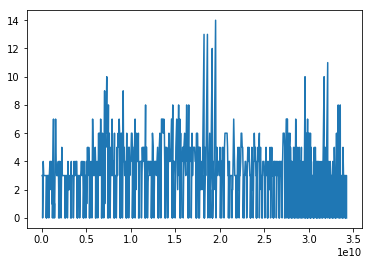

In [35]:
pyplot.plot(z,x)

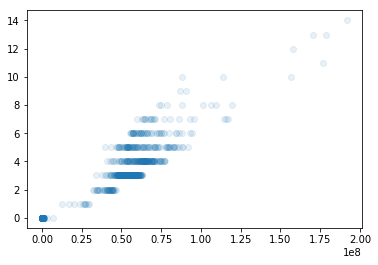

In [36]:
pyplot.scatter(y,x,alpha=0.1)

In [37]:
largest = max(y) 
areas = [(30*item/largest)**2 for item in y]

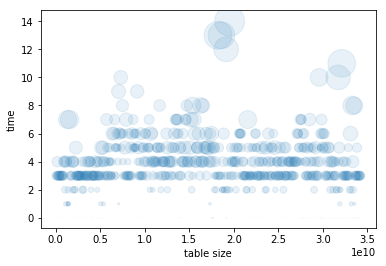

In [38]:
pyplot.xlabel('table size')
pyplot.ylabel('time')
pyplot.scatter(z,x,alpha=0.1,s=areas)

In [11]:
total

34248397405

In [58]:
items =[( 3.558141 , 55312997 ),( 3.320573 , 52206524 ),( 0.31357 , 409186 ),( 4.319520 , 66901490 ),( 3.594964 , 55650441 ),( 3.862701 , 60129979 ),( 3.787128 , 55991593 ),( 3.788815 , 59157445 ),( 3.903347 , 58518978 ),( 3.148669 , 49348122 ),( 0.31799 , 377240 ),( 3.997899 , 59142302 ),( 0.31611 , 374435 ),( 3.540262 , 55376266 ),( 3.687952 , 57892609 ),( 3.724370 , 56146034 ),( 3.653013 , 57068552 ),( 0.29754 , 376727 ),( 3.911819 , 60280459 ),( 4.488191 , 69986498 ),( 4.156306 , 63426187 ),( 3.675145 , 43767215 ),( 6.488985 , 76933835 ),( 2.148361 , 29832429 ),( 4.855657 , 65560989 ),( 0.39280 , 379088 ),( 8.322429 , 115600210 ),( 0.44583 , 389414 ),( 1.951504 , 27134026 ),( 3.113661 , 40127771 ),( 1.775142 , 23974651 ),( 2.64482 , 28803271 ),( 0.78112 , 388523 ),( 8.558535 , 117319614 ),( 4.786778 , 62708192 ),( 4.34154 , 54226508 ),( 4.437509 , 60414943 ),( 3.813945 , 52402198 ),( 5.371232 , 74428022 ),( 3.183598 , 42177404 ),( 0.45999 , 350212 ),( 5.646971 , 73570038 ),( 0.75792 , 347962 ),( 4.487080 , 63427425 ),( 3.319458 , 42584862 ),( 3.533296 , 47434175 ),( 2.907423 , 40896410 ),( 0.40234 , 355392 ),( 6.10716 , 83252782 ),( 4.194733 , 57255479 ),( 5.477793 , 61276761 ),( 4.883962 , 56556775 ),( 7.221305 , 59738253 ),( 6.663431 , 59303259 ),( 5.719279 , 49823383 ),( 0.47786 , 329430 ),( 7.997486 , 58481009 ),( 0.99692 , 330294 ),( 6.56684 , 56315839 ),( 6.15839 , 57617043 ),( 5.28365 , 55973107 ),( 4.106997 , 55617199 ),( 0.42492 , 325017 ),( 4.936049 , 59384055 ),( 4.811896 , 46163808 ),( 5.742243 , 61538448 ),( 4.585805 , 46552750 ),( 4.263307 , 55481261 ),( 3.582012 , 49312867 ),( 3.679815 , 50777217 ),( 0.47222 , 502828 ),( 7.141848 , 66491128 ),( 0.69069 , 501020 ),( 5.207180 , 55734342 ),( 4.306646 , 62894662 ),( 3.798965 , 58517340 ),( 3.801912 , 56690556 ),( 0.37969 , 489657 ),( 4.972386 , 70392258 ),( 4.236589 , 57829345 ),( 5.29972 , 66657689 ),( 4.170678 , 59529804 ),( 5.223853 , 67648438 ),( 5.331169 , 57447533 ),( 3.682724 , 35910780 ),( 0.75866 , 636049 ),( 6.343307 , 61500405 ),( 0.47919 , 622954 ),( 5.461821 , 55005095 ),( 4.364725 , 60891388 ),( 4.549256 , 58377696 ),( 4.842370 , 52958844 ),( 0.131651 , 633082 ),( 4.916351 , 61596218 ),( 7.362667 , 59231107 ),( 8.600795 , 77560210 ),( 6.540311 , 57648415 ),( 6.394955 , 61505902 ),( 5.919448 , 57342747 ),( 3.478111 , 32810901 ),( 0.64166 , 724318 ),( 6.271880 , 64503128 ),( 0.53113 , 728167 ),( 5.159256 , 51320456 ),( 6.633611 , 61526989 ),( 4.988076 , 55070614 ),( 4.33803 , 51084798 ),( 0.69981 , 730027 ),( 5.753783 , 67316839 ),( 3.44352 , 27442770 ),( 9.537613 , 88320261 ),( 5.659164 , 52650021 ),( 7.859825 , 83188824 ),( 4.151117 , 62503566 ),( 1.686641 , 25754181 ),( 0.32475 , 356019 ),( 4.396188 , 68129072 ),( 0.35723 , 352832 ),( 3.430958 , 53115780 ),( 3.879550 , 59310163 ),( 2.792161 , 43175662 ),( 3.308022 , 51932161 ),( 0.33953 , 366732 ),( 5.121588 , 77075416 ),( 3.660853 , 57793774 ),( 4.101110 , 58753956 ),( 3.957684 , 56170273 ),( 4.170015 , 60138089 ),( 4.397843 , 57458679 ),( 3.384172 , 44629475 ),( 0.17298 , 217804 ),( 5.527386 , 48690408 ),( 0.23106 , 217350 ),( 6.758727 , 57030978 ),( 5.562393 , 49992376 ),( 5.90978 , 45829772 ),( 5.83691 , 48548060 ),( 0.22593 , 216577 ),( 9.647205 , 86416059 ),( 3.540861 , 34167867 ),( 8.225684 , 75958320 ),( 5.705238 , 54255386 ),( 5.566110 , 66548982 ),( 3.467094 , 53247328 ),( 3.460812 , 51253909 ),( 0.19030 , 205633 ),( 3.223438 , 45786552 ),( 0.20740 , 210916 ),( 4.67343 , 61208366 ),( 3.475776 , 53478850 ),( 2.870097 , 43341718 ),( 3.338433 , 44162194 ),( 0.33082 , 199922 ),( 8.702843 , 90535530 ),( 1.672987 , 12816660 ),( 8.447140 , 75006581 ),( 6.866669 , 65940557 ),( 6.137402 , 88279212 ),( 3.97834 , 48482263 ),( 3.819186 , 58736572 ),( 0.25395 , 191451 ),( 5.308614 , 78415033 ),( 0.14599 , 199907 ),( 2.741407 , 42913043 ),( 3.712819 , 57148761 ),( 2.385180 , 37609144 ),( 3.590504 , 56369236 ),( 0.20557 , 196122 ),( 5.493017 , 82366227 ),( 3.167702 , 49219931 ),( 5.826388 , 86415095 ),( 3.106061 , 48436542 ),( 4.66941 , 59559392 ),( 3.869630 , 56955536 ),( 2.852816 , 40717947 ),( 0.17961 , 193285 ),( 4.754002 , 62252329 ),( 0.33839 , 193526 ),( 4.149260 , 58737744 ),( 3.66381 , 47751156 ),( 3.930342 , 57266032 ),( 2.816013 , 43693632 ),( 0.15990 , 193672 ),( 4.727565 , 73132615 ),( 3.689324 , 57005175 ),( 4.806941 , 74681022 ),( 3.219346 , 48768289 ),( 4.34666 , 62782524 ),( 3.693856 , 57169332 ),( 3.208801 , 46970184 ),( 0.23325 , 247661 ),( 3.289042 , 51525322 ),( 0.21238 , 255698 ),( 3.575443 , 55831917 ),( 3.226912 , 49598991 ),( 3.666778 , 57044855 ),( 3.74652 , 48070879 ),( 0.21932 , 246912 ),( 5.685685 , 86584972 ),( 3.11724 , 46574586 ),( 5.123607 , 79023980 ),( 2.920154 , 45098336 ),( 3.662345 , 56778281 ),( 3.235590 , 49841895 ),( 3.12010 , 46792047 ),( 0.35863 , 496260 ),( 5.12768 , 77024005 ),( 0.49540 , 520879 ),( 3.304911 , 51483969 ),( 3.731682 , 57700629 ),( 3.309064 , 50430789 ),( 4.664271 , 57015047 ),( 0.58685 , 514774 ),( 4.511154 , 64593654 ),( 5.965574 , 53775678 ),( 5.607499 , 66805054 ),( 6.75990 , 57088142 ),( 6.949995 , 65133190 ),( 6.160236 , 59045072 ),( 9.493296 , 48388797 ),( 0.92905 , 253936 ),( 10.123253 , 58739606 ),( 0.31985 , 261054 ),( 7.334170 , 63324859 ),( 6.598323 , 62745025 ),( 7.41458 , 54111134 ),( 7.323374 , 63809754 ),( 0.23357 , 265108 ),( 5.950954 , 54713399 ),( 3.710066 , 34791536 ),( 9.281234 , 88078162 ),( 3.437947 , 52161546 ),( 5.451504 , 72111168 ),( 7.356476 , 68930228 ),( 3.274193 , 31944779 ),( 0.24064 , 265981 ),( 5.632015 , 55174546 ),( 0.23987 , 270397 ),( 4.899770 , 70895998 ),( 4.370903 , 64502822 ),( 3.209685 , 49998953 ),( 4.566934 , 69310989 ),( 0.26255 , 265907 ),( 2.647532 , 39969628 ),( 3.752370 , 58456628 ),( 3.561809 , 54350277 ),( 3.912729 , 60540830 ),( 4.277461 , 66626262 ),( 3.972500 , 60847511 ),( 3.124419 , 49137879 ),( 0.28939 , 261446 ),( 4.896274 , 74972679 ),( 0.22553 , 260384 ),( 3.586495 , 56357862 ),( 4.391641 , 60173714 ),( 3.122609 , 39403887 ),( 6.198870 , 58983772 ),( 0.45633 , 258719 ),( 6.774196 , 63443019 ),( 6.787761 , 65245931 ),( 6.580888 , 62535293 ),( 6.429113 , 59471449 ),( 6.805868 , 65610993 ),( 6.967801 , 64920699 ),( 5.405132 , 50431430 ),( 0.22188 , 179226 ),( 5.487980 , 53231503 ),( 0.26068 , 173752 ),( 7.712366 , 73373088 ),( 8.462982 , 79256011 ),( 4.252339 , 39945145 ),( 5.448333 , 49291297 ),( 0.19767 , 173902 ),( 8.264088 , 76754048 ),( 6.778906 , 64813447 ),( 7.463193 , 68944197 ),( 6.698119 , 60333529 ),( 7.599255 , 70705689 ),( 6.717908 , 66894272 ),( 4.949237 , 49881937 ),( 0.38935 , 321130 ),( 6.633462 , 69234541 ),( 0.34295 , 325772 ),( 6.674927 , 66180765 ),( 7.664986 , 71873778 ),( 4.887941 , 49584971 ),( 3.812911 , 59917514 ),( 0.30894 , 317136 ),( 4.501379 , 68751383 ),( 4.456362 , 65111570 ),( 4.320878 , 68331335 ),( 4.67091 , 61211767 ),( 5.791529 , 70191754 ),( 4.507067 , 61477764 ),( 3.345756 , 52950751 ),( 0.63578 , 888696 ),( 5.318406 , 80270140 ),( 0.82028 , 930382 ),( 3.771335 , 59390757 ),( 4.56383 , 63426266 ),( 3.546143 , 53940196 ),( 3.963979 , 61012769 ),( 0.75824 , 905836 ),( 5.402702 , 70277847 ),( 5.982992 , 66256216 ),( 4.546490 , 70510952 ),( 4.209790 , 66065919 ),( 5.552271 , 83858942 ),( 4.828734 , 71085889 ),( 4.136049 , 64155413 ),( 0.26701 , 167018 ),( 4.815379 , 73934877 ),( 0.16391 , 174735 ),( 4.309621 , 66913108 ),( 3.942477 , 61121397 ),( 4.826465 , 75154301 ),( 3.914473 , 59722878 ),( 0.18674 , 183730 ),( 5.502524 , 86258755 ),( 6.165071 , 95924648 ),( 4.239090 , 63907023 ),( 2.877234 , 43784857 ),( 6.772419 , 106246213 ),( 3.118881 , 47666413 ),( 6.5454 , 93281420 ),( 0.32980 , 188157 ),( 5.529420 , 84596834 ),( 0.16739 , 195297 ),( 4.653282 , 72477564 ),( 5.115344 , 74954448 ),( 4.312764 , 67207860 ),( 4.905761 , 73239835 ),( 0.21346 , 190781 ),( 5.116635 , 80528690 ),( 5.468280 , 84213203 ),( 4.107868 , 63975777 ),( 3.812588 , 58262094 ),( 6.482943 , 101440063 ),( 4.789432 , 70110165 ),( 4.886936 , 73895210 ),( 0.26891 , 305177 ),( 5.679201 , 88312799 ),( 0.22219 , 293120 ),( 4.531043 , 70769250 ),( 5.198662 , 78079404 ),( 3.852060 , 60510813 ),( 5.39193 , 77596791 ),( 0.25715 , 296454 ),( 5.99094 , 80149252 ),( 3.766073 , 58300502 ),( 5.417183 , 84848850 ),( 5.902423 , 91720275 ),( 3.549649 , 54201376 ),( 4.265313 , 65474463 ),( 5.148744 , 75554086 ),( 1.97977 , 17183574 ),( 0.39257 , 407444 ),( 4.311222 , 67157563 ),( 0.34317 , 398934 ),( 6.359359 , 92942811 ),( 4.554896 , 69337793 ),( 4.560264 , 64144653 ),( 0.465646 , 6914842 ),( 5.96863 , 78897451 ),( 0.60635 , 406254 ),( 4.381752 , 67711011 ),( 2.441347 , 38471954 ),( 3.54849 , 46626273 ),( 4.115282 , 64907649 ),( 2.650768 , 41666701 ),( 2.679148 , 41438753 ),( 3.140087 , 45593967 ),( 11.801644 , 178398973 ),( 0.19742 , 244969 ),( 3.483368 , 51498268 ),( 0.22605 , 242677 ),( 3.756418 , 58738745 ),( 3.45043 , 48435898 ),( 3.195838 , 49631743 ),( 10.903984 , 170769479 ),( 2.936352 , 45481667 ),( 0.23634 , 244937 ),( 2.211400 , 34562074 ),( 2.517288 , 38780268 ),( 4.137196 , 63538458 ),( 4.635279 , 72387714 ),( 2.497460 , 34363781 ),( 0.19640 , 237738 ),( 2.712688 , 41609726 ),( 2.872800 , 49929986 ),( 16.36968 , 158089077 ),( 0.18338 , 154702 ),( 0.315211 , 3009734 ),( 3.154961 , 40866296 ),( 0.21652 , 162610 ),( 3.380316 , 52870363 ),( 3.132360 , 46974037 ),( 3.159426 , 44030439 ),( 12.346005 , 191621237 ),( 3.63823 , 46300837 ),( 0.17918 , 156328 ),( 2.272560 , 35194178 ),( 3.598865 , 56639758 ),( 3.727364 , 55922810 ),( 4.416185 , 66032770 ),( 3.365069 , 53692750 ),( 4.182783 , 65048354 ),( 3.587993 , 50032200 ),( 3.493371 , 54534749 ),( 3.425144 , 52810736 ),( 0.16608 , 186318 ),( 3.935545 , 60760474 ),( 4.296162 , 66819400 ),( 0.15967 , 188220 ),( 2.920510 , 43044290 ),( 4.160515 , 61809557 ),( 3.174857 , 47563054 ),( 5.622945 , 68536356 ),( 3.761088 , 58495500 ),( 0.19319 , 191608 ),( 3.303182 , 51494719 ),( 3.734304 , 57584351 ),( 3.637107 , 56890752 ),( 4.200071 , 62193130 ),( 3.752809 , 58518824 ),( 3.760025 , 57561866 ),( 3.433859 , 53060134 ),( 2.874811 , 44547479 ),( 3.620192 , 56219622 ),( 0.50287 , 288619 ),( 3.809927 , 59488608 ),( 3.800014 , 58009945 ),( 0.28963 , 289852 ),( 3.758117 , 54206030 ),( 3.846228 , 58492383 ),( 3.391934 , 51019709 ),( 3.819548 , 56925589 ),( 3.503616 , 52575840 ),( 0.24090 , 289198 ),( 2.919436 , 44200259 ),( 2.814241 , 41535612 ),( 8.719222 , 114347554 ),( 3.783026 , 59361135 ),( 3.860317 , 58780119 ),( 2.586141 , 40483811 ),( 2.989271 , 43669057 ),( 3.33216 , 47813121 ),( 0.48402 , 594858 ),( 3.894946 , 59565101 ),( 3.332856 , 52059253 ),( 0.52752 , 587008 ),( 3.798446 , 58240055 ),( 4.281465 , 55233391 ),( 4.512717 , 42001449 ),( 4.340122 , 42548043 ),( 4.968000 , 48775476 ),( 0.106800 , 578938 ),( 5.639497 , 54251034 ),( 4.72570 , 47338837 ),( 4.847456 , 69421305 ),( 3.586564 , 57299540 ),( 4.50782 , 62541047 ),( 3.350464 , 52601803 ),( 3.520247 , 54734035 ),( 3.704701 , 54756073 ),( 0.56079 , 710546 ),( 3.795083 , 59708416 ),( 3.898854 , 60443503 ),( 0.83149 , 742164 ),( 3.25132 , 47824193 ),( 3.892940 , 61544591 ),( 3.452482 , 54023016 ),( 3.459699 , 54157018 ),( 3.609512 , 56398070 ),( 0.61450 , 746466 ),( 3.257309 , 50094015 ),( 5.447797 , 79679293 ),( 3.902237 , 61620887 ),( 3.377175 , 53883877 ),( 3.305800 , 51334461 ),( 4.317068 , 57635906 ),( 3.445891 , 54349004 ),( 0.14725 , 153107 ),( 3.116193 , 47920548 ),( 0.29970 , 151644 ),( 2.800035 , 41034522 ),( 5.212967 , 82616092 ),( 2.802497 , 42587885 ),( 3.709658 , 55166818 ),( 3.123652 , 48217326 ),( 0.12440 , 153701 ),( 3.404053 , 52716795 ),( 4.712811 , 73561121 ),( 4.467478 , 68905705 ),( 3.846148 , 56101755 ),( 3.983109 , 59385335 ),( 3.120865 , 47163015 ),( 0.16046 , 178861 ),( 3.459565 , 53712517 ),( 0.27478 , 177059 ),( 3.718477 , 55557278 ),( 4.416146 , 63652288 ),( 5.588180 , 53483843 ),( 4.601854 , 55628832 ),( 3.965444 , 56038193 ),( 0.23522 , 175437 ),( 4.123754 , 42990311 ),( 6.84499 , 89034891 ),( 3.330431 , 48381087 ),( 2.451229 , 36161624 ),( 6.394200 , 60852729 ),( 0.30961 , 192555 ),( 5.591072 , 51000795 ),( 0.40315 , 195060 ),( 3.917598 , 57944161 ),( 3.497499 , 54608774 ),( 4.435551 , 68480818 ),( 3.702523 , 57974176 ),( 3.669033 , 56563663 ),( 0.38313 , 205813 ),( 3.415523 , 51624142 ),( 4.462520 , 70723437 ),( 3.237974 , 49710512 ),( 3.521562 , 54848065 ),( 3.574926 , 56340271 ),( 0.42392 , 458142 ),( 4.19763 , 62425410 ),( 0.35864 , 465115 ),( 3.155246 , 49154507 ),( 4.679449 , 64868730 ),( 6.476879 , 45128121 ),( 8.85411 , 71077974 ),( 8.31474 , 62005221 ),( 0.63079 , 461881 ),( 6.403271 , 57913737 ),( 8.125038 , 69534052 ),( 5.695461 , 53675606 ),( 5.827473 , 54064165 ),( 6.4799 , 56231460 ),( 0.27461 , 233351 ),( 6.591129 , 57726676 ),( 0.29632 , 237967 ),( 5.997416 , 53317947 ),( 7.23707 , 64472274 ),( 5.718399 , 51770140 ),( 7.326898 , 65204662 ),( 6.768456 , 60363171 ),( 0.31537 , 234488 ),( 6.609882 , 59038625 ),( 7.49932 , 64315470 ),( 6.335816 , 57622300 ),( 5.915073 , 55616659 ),( 5.903570 , 53774828 ),( 0.25284 , 191434 ),( 6.609399 , 59235132 ),( 0.23912 , 188892 ),( 5.749906 , 51874099 ),( 7.14559 , 62113405 ),( 5.900942 , 50209378 ),( 7.336099 , 67470198 ),( 6.526400 , 59799578 ),( 0.31408 , 194614 ),( 6.406435 , 57896870 ),( 7.188134 , 64773399 ),( 6.598270 , 59546183 ),( 6.138872 , 55562738 ),( 5.599191 , 54271295 ),( 0.32387 , 206487 ),( 6.256938 , 59952942 ),( 0.28880 , 203723 ),( 5.269213 , 50045295 ),( 10.71172 , 68079844 ),( 8.124251 , 60021803 ),( 0.109592 , 205122 ),( 7.135662 , 64777486 ),( 5.402146 , 45467207 ),( 7.76157 , 57356899 ),( 0.94279 , 783068 ),( 6.878526 , 60426917 ),( 0.113708 , 847111 ),( 5.836306 , 53614771 ),( 7.371401 , 66063551 ),( 0.92356 , 868370 ),( 6.775583 , 63442758 ),( 5.440596 , 50852010 ),( 6.41686 , 56780222 ),( 0.74639 , 213660 ),( 6.102227 , 56419941 ),( 0.32500 , 207052 ),( 6.85176 , 55770130 ),( 6.515328 , 62187796 ),( 0.35638 , 216650 ),( 7.419655 , 70940558 ),( 5.689571 , 49343699 ),( 5.724682 , 52490372 ),( 0.59341 , 209798 ),( 6.426295 , 53517724 ),( 0.29408 , 216480 ),( 9.696050 , 80786851 ),( 8.127895 , 62200321 ),( 0.33058 , 226635 ),( 6.721670 , 58803439 ),( 4.988468 , 47120432 ),( 5.350114 , 50508366 ),( 0.51581 , 294241 ),( 6.78680 , 54676331 ),( 0.40409 , 292712 ),( 6.623877 , 55359736 ),( 6.514941 , 62053736 ),( 0.60104 , 285762 ),( 7.510056 , 62667016 ),( 5.122086 , 44032682 ),( 6.823822 , 59140749 ),( 0.26901 , 199678 ),( 8.687412 , 78884106 ),( 0.30989 , 202780 ),( 5.987339 , 54840696 ),( 6.955568 , 63163312 ),( 0.27427 , 199603 ),( 7.324937 , 64385236 ),( 5.501940 , 52161288 ),( 6.865133 , 60414777 ),( 0.52880 , 307575 ),( 12.222327 , 113816903 ),( 0.30550 , 299001 ),( 6.671095 , 64707375 ),( 0.46769 , 303297 ),( 3.481196 , 39551152 ),( 6.363950 , 62405631 ),( 4.918905 , 46496327 ),( 0.110479 , 1015042 ),( 7.217301 , 69898578 ),( 0.143540 , 1078901 ),( 4.466579 , 69091109 ),( 0.80540 , 1095478 ),( 4.454295 , 70597658 ),( 4.102658 , 63502055 ),( 4.190252 , 53803566 ),( 0.31390 , 282662 ),( 5.341897 , 63580064 ),( 0.23048 , 279052 ),( 4.734154 , 74022187 ),( 0.24350 , 278230 ),( 3.921815 , 61615116 ),( 3.886697 , 60339042 ),( 3.106417 , 47222419 ),( 3.121600 , 47910531 ),( 0.20593 , 182412 ),( 4.857236 , 63538591 ),( 0.242347 , 221548 ),( 7.408793 , 72194044 ),( 0.37356 , 222183 ),( 6.458555 , 59835736 ),( 6.979836 , 65438928 ),( 5.121671 , 49340410 ),( 4.590341 , 44574399 ),( 0.47782 , 220074 ),( 6.678338 , 63410790 ),( 0.31525 , 214933 ),( 7.966830 , 74436414 ),( 0.44475 , 275240 ),( 0.20801 , 216867 ),( 4.155665 , 57598009 ),( 4.174334 , 63669933 ),( 2.856067 , 43442068 ),( 0.42906 , 474925 ),( 3.646799 , 55804141 ),( 0.38627 , 481912 ),( 4.365174 , 66292923 ),( 3.343664 , 50488222 ),( 0.44790 , 490512 ),( 3.692586 , 56949059 ),( 3.935060 , 58879790 ),( 3.290654 , 50398669 ),( 0.62080 , 787496 ),( 2.702467 , 41384416 ),( 0.64705 , 797883 ),( 4.66629 , 43769641 ),( 12.25024 , 156869389 ),( 0.64682 , 786910 ),( 6.365083 , 56738419 ),( 8.167857 , 71265665 ),( 3.583312 , 34064888 ),( 0.53370 , 383410 ),( 2.826101 , 27214377 ),( 0.44593 , 392306 ),( 4.154752 , 37493270 ),( 18.154236 , 176605148 ),( 0.50658 , 388835 ),( 4.30302 , 59019927 ),( 4.24025 , 60536162 ),( 3.195475 , 48677635 ),( 0.19556 , 240042 ),( 4.9461 , 53358126 ),( 0.26222 , 239576 ),( 6.626274 , 62071498 ),( 6.746857 , 62375637 ),( 0.36803 , 241198 ),( 5.898048 , 57194867 ),( 6.65291 , 59419324 ),( 4.24650 , 50568324 ),( 0.31193 , 352651 ),( 4.324936 , 55125673 ),( 0.37404 , 359480 ),( 6.456854 , 59269808 ),( 6.321157 , 56667107 ),( 0.47025 , 341445 ),( 5.367190 , 52863564 ),( 6.14574 , 55939958 ),( 5.740138 , 53004151 ),( 0.39298 , 220336 ),( 4.903630 , 45024505 ),( 0.27549 , 217304 ),( 9.952614 , 94116819 ),( 4.564559 , 42566188 ),( 0.33838 , 219141 ),( 2.925835 , 26337762 ),( 11.982382 , 119367021 ),( 8.65895 , 76722618 ),( 0.42589 , 470239 ),( 4.768447 , 44655290 ),( 0.63401 , 479987 ),( 11.251080 , 109564468 ),( 2.116019 , 20379392 ),( 0.54039 , 484442 ),( 5.31213 , 57093205 ),( 3.908702 , 59209107 ),( 3.974287 , 57162649 ),( 0.75167 , 1050642 ),( 3.433018 , 53917635 ),( 0.98029 , 1150031 ),( 3.926757 , 60031011 ),( 4.708710 , 53700096 ),( 0.135518 , 1029774 ),( 3.380779 , 51636366 ),( 4.29912 , 62129177 ),( 3.848645 , 59125339 ),( 0.38977 , 405929 ),( 3.622724 , 54175663 ),( 0.29778 , 341804 ),( 5.699467 , 58081770 ),( 3.504043 , 54489245 ),( 0.23128 , 265208 )]

In [59]:
x,y = zip(*items)

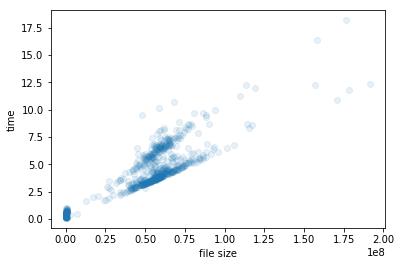

In [53]:
pyplot.xlabel('file size')
pyplot.ylabel('time')
pyplot.scatter(y,x,alpha=0.1)

In [54]:
from scipy import stats

In [64]:
stats.pearsonr(x,y)

(0.8936003754671448, 5.397911142804535e-260)